In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
%matplotlib inline

In [3]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [9]:
step_function(0.4)

AttributeError: 'bool' object has no attribute 'astype'

In [10]:
step_function(np.array([1.0, 2.0]))

array([1, 1])

In [11]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [12]:
step_function(np.array([1.0, 2.0]))

array([1, 1])

In [13]:
x = np.array([1.0, 2.0])
x > 0

array([ True,  True])

In [14]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

(-0.1, 1.1)

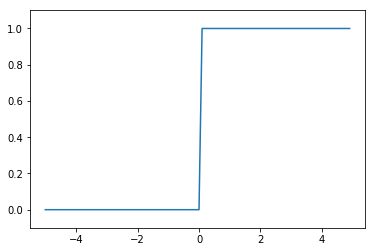

In [16]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

(-0.1, 1.1)

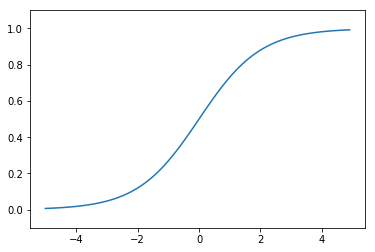

In [18]:
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

In [19]:
def relu(x):
    return np.maximum(0, x)

(-0.1, 5.0)

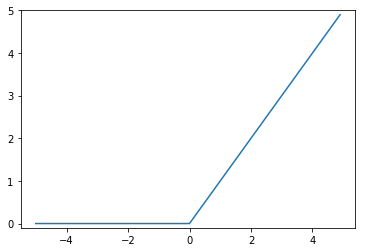

In [20]:
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.0)

### 신경망 각 층의 신호 전달

In [21]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [22]:
A1 = np.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


In [23]:
type(A1)

numpy.ndarray

In [35]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [36]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [37]:
A2 = np.dot(Z1, W2) + B2
print(A2)

[0.51615984 1.21402696]


In [38]:
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [28]:
def identity_function(x):
    return x

In [29]:
W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
print(A3)

[0.31682708 0.69627909]


In [39]:
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


### 앞서 수행한 내용 정리

In [69]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])    
    network['W2'] = np.array([[0.1, 0.4],
                              [0.2, 0.5],
                              [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],
                              [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    
    return network

In [70]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Y = identity_function(A3)
    
    return Y    

In [71]:
network = init_network()
network

X = np.array([1.0, 0.5])
Y = forward(network, X)

In [43]:
print(Y)

[0.31682708 0.69627909]


In [44]:
# 연습

In [72]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0,4],
                              [0.2, 0.5],
                              [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],
                              [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network
                             
    
def forward(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [75]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

TypeError: can't multiply sequence by non-int of type 'float'

In [74]:
print(network)

{'W1': array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]]), 'b1': array([0.1, 0.2, 0.3]), 'W2': array([list([0.1, 0, 4]), list([0.2, 0.5]), list([0.3, 0.6])],
      dtype=object), 'b2': array([0.1, 0.2]), 'W3': array([[0.1, 0.3],
       [0.2, 0.4]]), 'b3': array([0.1, 0.2])}


### softmax func.

In [ ]:
a = np.array([0.3, 2.9, 4.0, 10.0, 1000.0])
exp_a = np.exp(a)
print(a)
print(exp_a)

In [ ]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

In [ ]:
y = exp_a / sum_exp_a
print(y)

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [ ]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

In [ ]:
c = np.max(a)

In [ ]:
a - c

In [ ]:
np.exp(a - c) / np.sum(np.exp(a - c))

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [ ]:
a = np.array([1010, 1000, 990])
y = softmax(a)
y

In [ ]:
np.sum(y)

In [ ]:
aa = np.array([0.3, 2.9, 4.0])
yy = softmax(aa)
print(yy)

### 테스트 이미지를 입력해서 실제로 잘 판단하는지 확인

In [12]:
pwd

'C:\\dev\\_python\\Deep_Learning_from_Scratch\\ipynb\\DLFS_ipynb\\ch03'

In [5]:
cd ch03         

C:\dev\_python\Deep_Learning_from_Scratch\ipynb\DLFS_ipynb\ch03


In [6]:
# 이 경로 안에 넣어주거나, 경로를 맞게 써줌  

In [10]:
import sys, os
sys.path.append(os.pardir)   # os.parents dir  상위 디렉토리 추가     찾고자하는 파일이 없으면 상위디렉로티레에서패스 설정해 주는 것
sys.path

['',
 'C:\\Users\\No.1\\AppData\\Local\\Continuum\\anaconda3\\envs\\da36\\python36.zip',
 'C:\\Users\\No.1\\AppData\\Local\\Continuum\\anaconda3\\envs\\da36\\DLLs',
 'C:\\Users\\No.1\\AppData\\Local\\Continuum\\anaconda3\\envs\\da36\\lib',
 'C:\\Users\\No.1\\AppData\\Local\\Continuum\\anaconda3\\envs\\da36',
 'C:\\Users\\No.1\\AppData\\Local\\Continuum\\anaconda3\\envs\\da36\\lib\\site-packages',
 'C:\\Users\\No.1\\AppData\\Local\\Continuum\\anaconda3\\envs\\da36\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\No.1\\.ipython',
 '..',
 '..',
 '..',
 '..']

In [13]:
from dataset.mnist import load_mnist

In [14]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

In [15]:
print(x_train.shape)

(60000, 784)


In [16]:
print(t_train.shape)

(60000,)


In [17]:
print(x_test.shape)

(10000, 784)


In [18]:
print(t_test.shape)

(10000,)


In [19]:
type(x_train), type(x_test)

(numpy.ndarray, numpy.ndarray)

In [22]:
x_train[0]    # 첫번째 자료의 픽셀

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [21]:
t_train[0]      # 첫번째 데이터는 5


5

In [7]:
import numpy as np
import neuralnet_mnist
import mnist_show
from dataset.mnist import load_mnist

# 모듈설치

Accuracy:0.9352
5
(784,)
(28, 28)


In [31]:
img = x_train[2]
img = img.reshape(28,28)
mnist_show.img_show(img)

In [26]:
# 테스트 이미지와 레이블 읽어들임
_, (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 테스트할 이미지를 눈으로 확인
img = x_test[1111]
label = t_test[1111]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

mnist_show.img_show(img)

4
(784,)
(28, 28)


In [32]:
# 신경망 초기화                                                 # neuralnet_mnist.py  파일 안에 있는 것들.
# 미리 학습해 두었던 가중치와 바이어스를 읽어들임
network = neuralnet_mnist.init_network()
print(network)

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

In [35]:
print(network['b2'].shape)     # 2번째 층의 노드가 갯수가 100개이다.

print(network['W1'].shape)    # 첫번째 w 50, 784      입력이 784개 -> 노드 50개
print(network['W2'].shape)    #                        노드 50개 -> 100개
print(network['W3'].shape)    # 세번째 w 10, 100 가중치       노드 100개 -> 10개

(100,)
(784, 50)
(50, 100)
(100, 10)


In [ ]:
# 정규화된 테스트 이미지를 새로 불러들임
x_test, t_test = neuralnet_mnist.get_data()             # 정규화된 값으로 학습을 하였다.


In [36]:
# 테스트 이미지를 입력하여 신경망의 결과를 얻음
y = neuralnet_mnist.predict(network, x_test[1111])
y     # 소프트맥스로 구함   ( neuralnet_mnist 내 predict 함수 확인)

array([3.9928027e-06, 1.5420535e-07, 8.5585663e-05, 1.8558582e-07,
       9.9727792e-01, 2.6887508e-05, 2.1761536e-04, 1.3432311e-04,
       1.9543729e-04, 2.0579894e-03], dtype=float32)

In [37]:
p = np.argmax(y)   # y 중에서 가장 큰 값의 인덱스 값이 나옴   
print(y)

[3.9928027e-06 1.5420535e-07 8.5585663e-05 1.8558582e-07 9.9727792e-01
 2.6887508e-05 2.1761536e-04 1.3432311e-04 1.9543729e-04 2.0579894e-03]


In [39]:
# 신경망의 추론 결과
# 입력 이미지의 레이블과 비교해 봅시다.
print(p)
print(label)   # 학습한 결과가 잘 맞춰짐.      3

4
4


In [40]:
x_777 = x_test[777]
t_777 = t_test[777]
print(t_777)

1


In [42]:
mnist_show.img_show(img.reshape(28,28))

In [46]:
y = neuralnet_mnist.predict(network, x_777)
         
print(y)                       # 99%의 확률로 1이다.
print(np.argmax(y), t_777)     # 훈련 값과 결과값을 비교함.          

[2.16029653e-10 9.91773546e-01 2.22601793e-05 8.79619984e-05
 1.53669534e-04 1.58975556e-04 8.04712909e-05 3.45295630e-05
 7.57114682e-03 1.17493415e-04]
1 1


In [ ]:
print(network)

### 신경망 각 층의 배열 형상(shape)

In [ ]:
x, _ = neuralnet_mnist.get_data()

In [ ]:
network = neuralnet_mnist.init_network()

In [ ]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [ ]:
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

In [47]:
import importlib

In [48]:
import neuralnet_mnist_batch

Accuracy:0.9352


In [55]:
importlib.reload(neuralnet_mnist)

Accuracy:0.9352


<module 'neuralnet_mnist' from 'C:\\dev\\_python\\Deep_Learning_from_Scratch\\ipynb\\DLFS_ipynb\\ch03\\neuralnet_mnist.py'>

In [56]:
importlib.reload(neuralnet_mnist_batch)

Accuracy:0.9352


<module 'neuralnet_mnist_batch' from 'C:\\dev\\_python\\Deep_Learning_from_Scratch\\ipynb\\DLFS_ipynb\\ch03\\neuralnet_mnist_batch.py'>

### 평균 제곱 오차

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 예1-1: '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [ ]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
import numpy as np

In [ ]:
mean_squared_error(np.array(y), np.array(t))

In [ ]:
# 예1-2: '2'일 확률이 더 높은 경우
y = [0.1, 0.05, 0.7, 0.0, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]

In [ ]:
mean_squared_error(np.array(y), np.array(t))

In [ ]:
# 예2: '7'일 확률이 가장 높다고 추정된 결과
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [ ]:
mean_squared_error(np.array(y), np.array(t))

### 교차 엔트로피 오차

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 예1-1: '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

In [ ]:
# 예1-2: '2'일 확률이 더 높은 경우
y = [0.1, 0.05, 0.7, 0.0, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

In [ ]:
# 예2: '7'일 확률이 가장 높다고 추정된 결과
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

In [ ]:
a = np.arange(10)
a

In [ ]:
np.sum(a)

In [ ]:
b = a.reshape(5, 2)
b

In [ ]:
np.sum(b)

In [ ]:
np.sum(b, axis=0)

In [ ]:
np.sum(b, axis=1)

### 임의의 훈련 데이터 또는 시험 데이터 뽑기
numpy.random.choice()

In [ ]:
np.random.choice(1000, 10)

In [ ]:
np.random.choice(10, 5)

In [ ]:
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True,
                                                  one_hot_label=True)

In [ ]:
print(x_train.shape)

In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

In [ ]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
print(x_batch[0])
print(t_batch[0])

### (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [ ]:
print(network)

In [ ]:
y = neuralnet_mnist.predict(network, x_batch)

In [ ]:
print(y)
print(t_batch)

In [ ]:
cross_entropy_error(y, t_batch)

In [ ]:
y = np.arange(30).reshape(3, 10)
print(y)

In [ ]:
t = np.array([3, 7, 1])
print(t)

In [ ]:
batch_size = y.shape[0]
print(batch_size)

In [ ]:
y[np.arange(batch_size), t]

### 수치 미분의 예

In [ ]:
np.float32(1e-50)

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)

In [ ]:
numerical_diff(function_1, 5)

In [ ]:
def tangent_line(f, x):
    a = numerical_diff(f, x)
    print(a)
    b = f(x) - a*x
    return lambda t: a*t + b

In [ ]:
tangent = tangent_line(function_1, 5)
tl = tangent(x)
print(tl)

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, tl)

In [ ]:
pwd

In [ ]:
cd ch04

### enumerate

In [ ]:
for idx, x in enumerate(['a', 'b', 'c']):
    print(idx, x)

In [ ]:
import importlib
importlib.reload(gradient_2d)

In [ ]:
%run gradient_2d

##

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [ ]:
init_x = np.array([-3.0, 4.0])

In [ ]:
import gradient_method

In [ ]:
importlib.reload(gradient_method)

In [ ]:
init_x = np.array([-3.0, 4.0])
result, _ = gradient_method.gradient_descent(function_2, init_x=init_x,
                                             lr=0.1, step_num=100)
result

In [ ]:
init_x

In [ ]:
# 학습률이 크면
result, _ = gradient_method.gradient_descent(function_2, init_x,
                                             lr=10.0, step_num=100)
result

In [ ]:
# 학습률이 작으면
result, _ = gradient_method.gradient_descent(function_2, init_x,
                                             lr=1e-10, step_num=100)
result

### 파이썬 리스트 복사

In [ ]:
a = [9, 2, 1, 4]
b = a
print(a, b)

In [ ]:
b[0] = 999
print(a, b)

In [ ]:
c = a[:]
d = list(a)
print(c is a)
print(d is a)
print(b is a)

In [ ]:
a = [1, 2, ['a', 'b'], 3]
c = a[:]
print(c is a)

In [ ]:
a[2][1] = 'xyz'
print(a)

In [ ]:
print(c)

In [ ]:
import copy

In [ ]:
d = copy.deepcopy(a)

In [ ]:
a[2][0] = 'abc'
print(a)
print(c)
print(d)

In [ ]:
a[0] = 111
print(a)
print(c)
print(d)

In [ ]:
def func_a(x):
    my_x = x
    print(my_x)
    my_x = 200
    return my_x   

In [ ]:
x = 20
func_a(x)

In [ ]:
print(x)

In [ ]:
def func_a(x):
    x[0] = 0
    return x[0]

In [ ]:
a = [1, 2, 3]

In [ ]:
func_a(a)

In [ ]:
a

In [ ]:
b = (1, 2, 3)
func_a(b)

### numpy array 객체 복사

In [ ]:
a = np.array([1, 2, 3, 4])

In [ ]:
b = a
print(b is a)

In [ ]:
c = a[:]
print(c is a)

In [ ]:
c[0] = 111
print(c)
print(a)

In [ ]:
d = np.array(a)
print(d is a)

In [ ]:
d[1] = 222
print(d)
print(a)

In [ ]:
e = a.copy()
e[2] = 333
print(e)
print(a)

In [ ]:
def func_a(x):
    x[0] = 777
    return

In [ ]:
func_a(a)

In [ ]:
print(a)

### 신경망에서의 기울기

In [ ]:
import gradient_simplenet

In [ ]:
import train_neuralnet

### 2계층 신경망으로 MNIST 학습하기

In [ ]:
train_neuralnet.network.params['W1']